## Bank Review Analysis & Visualization & Insights
This notebook analyzes bank reviews to derive insights, visualize sentiment and themes, and suggest practical improvements.



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pathlib import Path
import sys

# For nicer plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [10]:
# Set project root and CSV path
PROJECT_ROOT = Path.cwd().parent  # notebooks/ is inside project root
sys.path.insert(0, str(PROJECT_ROOT))

from utils.config import DATA_PATHS

csv_path = DATA_PATHS['sentiment_results']

# Load CSV
df = pd.read_csv(csv_path)
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')


print(f"Loaded {len(df)} reviews")
df.head()


Loaded 1399 reviews


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,vader_score,vader_label,textblob_score,textblob_label,distilbert_label,distilbert_score,identified_theme
0,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Wariyo Dida,0,9,Google Play,0.4927,POSITIVE,0.91,POSITIVE,POSITIVE,0.999852,General / Unspecified
1,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play,0.0000,NEUTRAL,0.00,NEUTRAL,NEGATIVE,0.997528,General / Unspecified
2,11306fb9-5571-4950-8d32-604c5402242f,good,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Tsegay ab,0,4,Google Play,0.4404,POSITIVE,0.70,POSITIVE,POSITIVE,0.999816,General / Unspecified
3,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,BOA,Bank of Abyssinia,Yohanis Fikadu,0,8,Google Play,0.4404,POSITIVE,0.70,POSITIVE,POSITIVE,0.999841,General / Unspecified
4,f28a3a3c-eb94-4aab-88d2-89bcecebcc7b,bad exprience it is so crushed,1,2025-11-27,2025,11,BOA,Bank of Abyssinia,ሻንበል ኪዳነ,0,30,Google Play,-0.7973,NEGATIVE,-0.40,NEGATIVE,NEGATIVE,0.999739,General / Unspecified


### Overview of banks and ratings

In [12]:
# Number of reviews per bank
print(df['bank_name'].value_counts())
print("\n------------------------\n")
# Rating statistics per bank
print(df.groupby('bank_name')['rating'].describe())


bank_name
Dashen Bank                    471
Commercial Bank of Ethiopia    465
Bank of Abyssinia              463
Name: count, dtype: int64

------------------------

                             count      mean       std  min  25%  50%  75%  \
bank_name                                                                    
Bank of Abyssinia            463.0  3.259179  1.847485  1.0  1.0  4.0  5.0   
Commercial Bank of Ethiopia  465.0  4.077419  1.482086  1.0  4.0  5.0  5.0   
Dashen Bank                  471.0  4.093418  1.532547  1.0  4.0  5.0  5.0   

                             max  
bank_name                         
Bank of Abyssinia            5.0  
Commercial Bank of Ethiopia  5.0  
Dashen Bank                  5.0  


## Sentiment distributions – Vader, TextBlob, DistilBERT

In [14]:
# Vader sentiment distribution
vader_dist = df.groupby(['bank_name','vader_label']).size().unstack(fill_value=0)
print("Vader sentiment distribution:")
print(vader_dist)
print("\n------------------------\n")

# TextBlob sentiment distribution
textblob_dist = df.groupby(['bank_name','textblob_label']).size().unstack(fill_value=0)
print("\nTextBlob sentiment distribution:")
print(textblob_dist)
print("\n------------------------\n")

# DistilBERT sentiment distribution
distilbert_dist = df.groupby(['bank_name','distilbert_label']).size().unstack(fill_value=0)
print("\nDistilBERT sentiment distribution:")
print(distilbert_dist)


Vader sentiment distribution:
vader_label                  NEGATIVE  NEUTRAL  POSITIVE
bank_name                                               
Bank of Abyssinia                  95      134       234
Commercial Bank of Ethiopia        38      130       297
Dashen Bank                        47       91       333

------------------------


TextBlob sentiment distribution:
textblob_label               NEGATIVE  NEUTRAL  POSITIVE
bank_name                                               
Bank of Abyssinia                  75      157       231
Commercial Bank of Ethiopia        33      142       290
Dashen Bank                        45       89       337

------------------------


DistilBERT sentiment distribution:
distilbert_label             NEGATIVE  POSITIVE
bank_name                                      
Bank of Abyssinia                 244       219
Commercial Bank of Ethiopia       152       313
Dashen Bank                       137       334


## Drivers (Positive Themes) – All 3

In [16]:
# Vader positive drivers
vader_positive = (
    df[df['vader_label']=='POSITIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("Vader positive drivers:\n", vader_positive)
print("\n------------------------\n")


# TextBlob positive drivers
textblob_positive = (
    df[df['textblob_label']=='POSITIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("\nTextBlob positive drivers:\n", textblob_positive)
print("\n------------------------\n")


# DistilBERT positive drivers
distilbert_positive = (
    df[df['distilbert_label']=='POSITIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("\nDistilBERT positive drivers:\n", distilbert_positive)


Vader positive drivers:
 bank_name                    identified_theme     
Bank of Abyssinia            General / Unspecified    154
                             Mobile App & Digital      55
Commercial Bank of Ethiopia  General / Unspecified    179
                             Mobile App & Digital      92
Dashen Bank                  General / Unspecified    169
                             Mobile App & Digital     123
Name: count, dtype: int64

------------------------


TextBlob positive drivers:
 bank_name                    identified_theme     
Bank of Abyssinia            General / Unspecified    155
                             Mobile App & Digital      53
Commercial Bank of Ethiopia  General / Unspecified    170
                             Mobile App & Digital      95
Dashen Bank                  General / Unspecified    171
                             Mobile App & Digital     124
Name: count, dtype: int64

------------------------


DistilBERT positive drivers:
 bank_name  

## Pain Points (Negative Themes) – All 3

In [17]:
# Vader negative pain points
vader_negative = (
    df[df['vader_label']=='NEGATIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("Vader negative pain points:\n", vader_negative)
print("\n------------------------\n")


# TextBlob negative pain points
textblob_negative = (
    df[df['textblob_label']=='NEGATIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("\nTextBlob negative pain points:\n", textblob_negative)
print("\n------------------------\n")


# DistilBERT negative pain points
distilbert_negative = (
    df[df['distilbert_label']=='NEGATIVE']
    .groupby('bank_name')['identified_theme']
    .value_counts()
    .groupby(level=0)
    .head(2)
)
print("\nDistilBERT negative pain points:\n", distilbert_negative)


Vader negative pain points:
 bank_name                    identified_theme     
Bank of Abyssinia            Mobile App & Digital     45
                             General / Unspecified    40
Commercial Bank of Ethiopia  Mobile App & Digital     18
                             General / Unspecified    13
Dashen Bank                  General / Unspecified    20
                             Mobile App & Digital     15
Name: count, dtype: int64

------------------------


TextBlob negative pain points:
 bank_name                    identified_theme     
Bank of Abyssinia            Mobile App & Digital     37
                             General / Unspecified    30
Commercial Bank of Ethiopia  General / Unspecified    13
                             Mobile App & Digital     11
Dashen Bank                  General / Unspecified    22
                             Mobile App & Digital     12
Name: count, dtype: int64

------------------------


DistilBERT negative pain points:
 bank_name  

## Visualization – Vader Sentiment Distribution

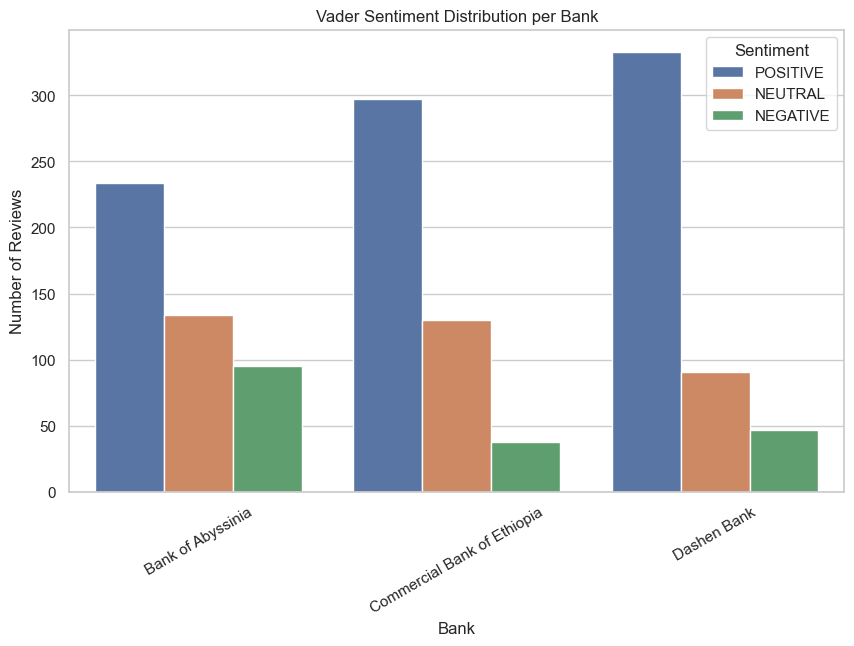

In [18]:
sns.countplot(data=df, x='bank_name', hue='vader_label')
plt.title("Vader Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=30)
plt.show()


## Visualization – TextBlob Sentiment Distribution

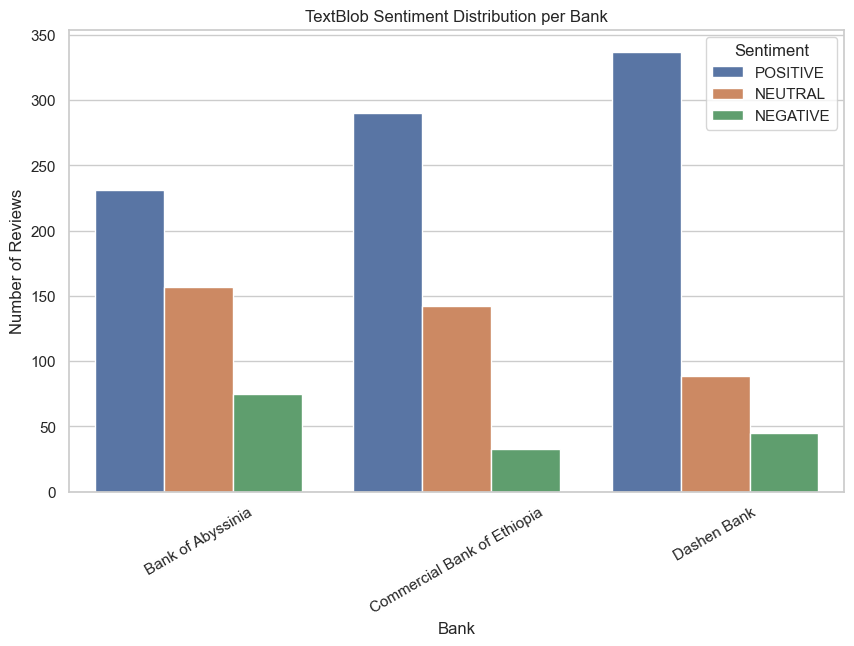

In [19]:
sns.countplot(data=df, x='bank_name', hue='textblob_label')
plt.title("TextBlob Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=30)
plt.show()


## Visualization – DistilBERT Sentiment Distribution

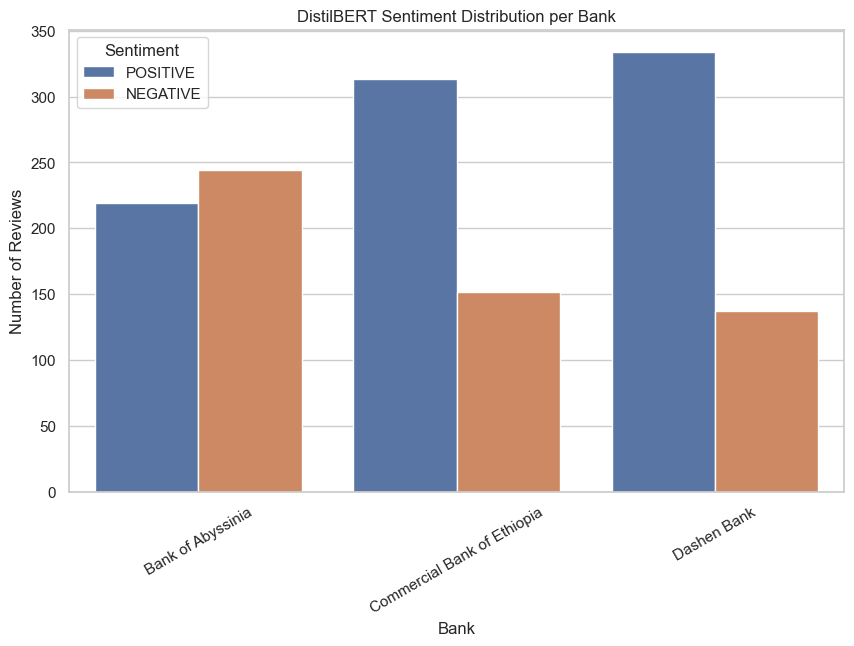

In [20]:
sns.countplot(data=df, x='bank_name', hue='distilbert_label')
plt.title("DistilBERT Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=30)
plt.show()


## Visualization – Rating Distribution

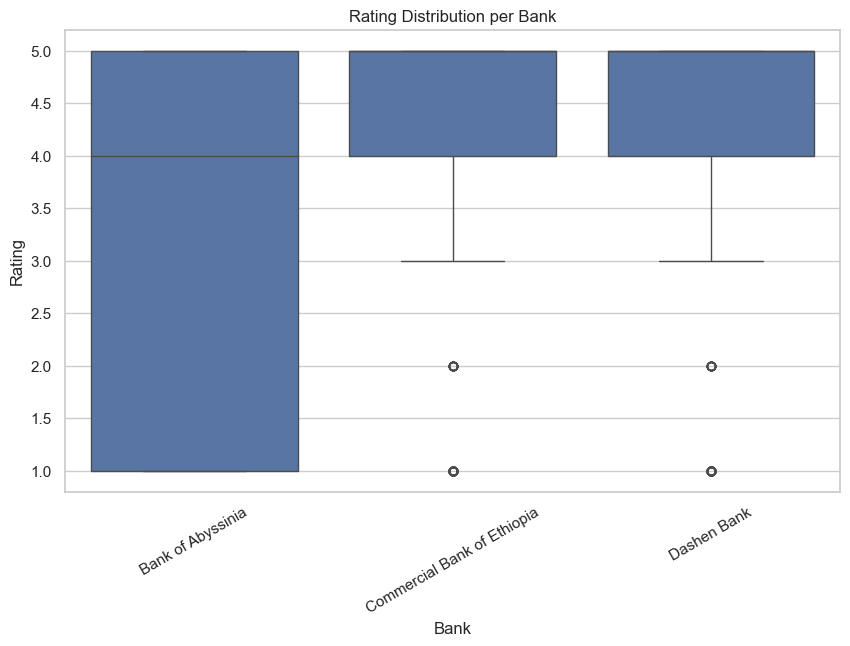

In [21]:
sns.boxplot(data=df, x='bank_name', y='rating')
plt.title("Rating Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Rating")
plt.xticks(rotation=30)
plt.show()


## Visualization – Word Clouds for Themes

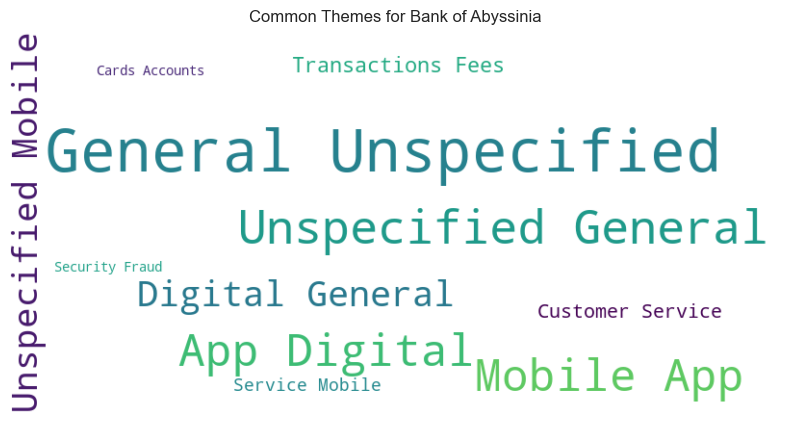

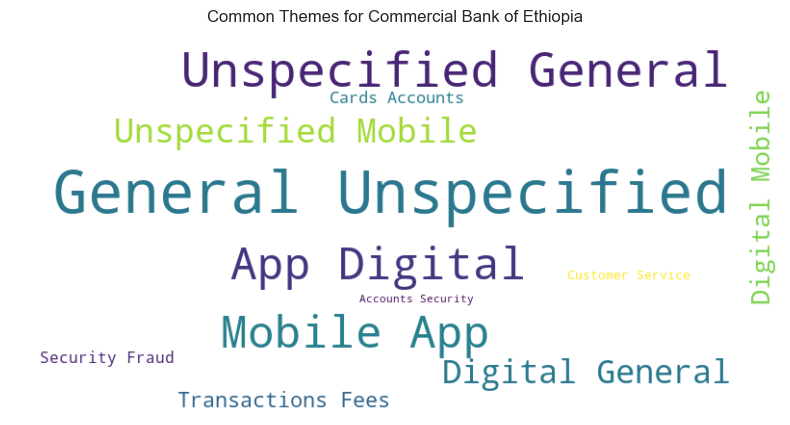

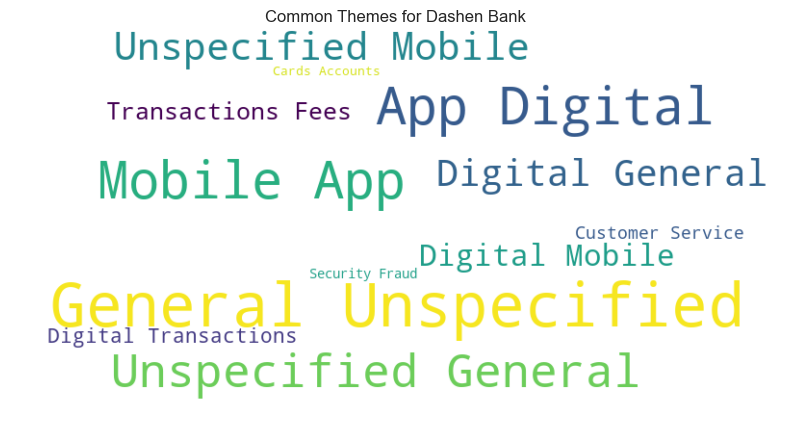

In [22]:
for bank in df['bank_name'].unique():
    text = " ".join(df[df['bank_name'] == bank]['identified_theme'].dropna())
    if text.strip() == "":
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Common Themes for {bank}")
    plt.show()


## Insights & Recommendations
### Key Data Insights

#### 1. Performance Gap:

- Dashen Bank and Commercial Bank of Ethiopia (CBE) are the clear leaders with high average ratings (~4.1/5) and a strong positive sentiment ratio (approx. 2:1 positive to negative).

- Bank of Abyssinia (BoA) is lagging significantly with an average rating of    3.26/5. It is the only bank in this dataset with more Negative (244) than Positive (219) reviews (based on DistilBERT analysis).

#### The "Mobile App" Double-Edged Sword:

- For Dashen Bank, "Mobile App & Digital" is a strong Positive Driver, with users frequently praising the digital experience.

- For Bank of Abyssinia, "Mobile App & Digital" is a major Pain Point. It appears in 94 negative reviews versus only 42 positive reviews, identifying it as the primary source of customer dissatisfaction.

#### Common Pain Points:

- Across all banks, when users leave low ratings (1-2 stars), the specific complaints most often revolve around app functionality (crashes, bugs) and occasionally "Transactions & Fees".

#### 2. Strategic Recommendations
#### For Bank of Abyssinia (Urgent):

- Technical Audit: The high volume of negative sentiment around digital services suggests critical stability or usability issues. An immediate audit of the mobile app's recent updates is recommended to identify bugs causing crashes or login failures.

- Crisis Management: Implement a proactive response strategy on app stores. Acknowledge the specific technical issues users are reporting to rebuild trust while fixes are being deployed.

#### For Dashen Bank & CBE (Maintain & Grow):

- Feature Spotlight: Since users rate the digital experience highly, marketing campaigns should highlight specific popular app features (e.g., ease of transfer, reliability) to attract customers from competitors with poorer digital tools.

- Monitor "Transactions": While overall sentiment is positive, keep a close watch on the "Transactions & Fees" theme. Addressing these specific financial friction points can help push ratings even higher (towards 4.5+).

### General Recommendation:

Review Prompting: A large portion of reviews are "General / Unspecified" (e.g., just saying "Good"). Updating the in-app review prompt to ask specific questions (e.g., "How was your transfer experience?") could generate more actionable feedback in the future.